In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install tweepy
! pip install pandas tweepy
! pip install textblob

In [39]:
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
print("Dataset Preview:")
display(users_df.head())

print("\nDataset Information:")
users_df.info()

print("\nSummary Statistics:")
display(users_df.describe())

Dataset Preview:


,City,Region,Country,ParentLocation,AirQuality,WaterPollution
0,New York City,New York,United States of America,Americas,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,Americas,66.129032,49.107143
2,San Francisco,California,United States of America,Americas,60.514019,43.000000
3,Los Angeles,California,United States of America,Americas,36.621622,61.299435
4,Alexandria,Virginia,United States of America,Americas,89.062500,46.153846



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3082 non-null   object 
 1   Region          2790 non-null   object 
 2   Country         3082 non-null   object 
 3   ParentLocation  3082 non-null   object 
 4   AirQuality      3082 non-null   float64
 5   WaterPollution  3082 non-null   float64
dtypes: float64(2), object(4)
memory usage: 144.6+ KB

Summary Statistics:


,AirQuality,WaterPollution
count,3082.000000,3082.000000
mean,68.336600,41.826076
std,27.446439,25.075062
min,0.000000,0.000000
25%,50.000000,25.000000
50%,75.000000,50.000000
75%,90.748355,51.785714
max,100.000000,100.000000


In [41]:
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
print(users_df.columns)

Index(['City', 'Region', 'Country', 'ParentLocation', 'AirQuality',
       'WaterPollution'],
      dtype='object')


In [50]:
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
users_df = users_df[['City', 'Region', 'Country', 'ParentLocation', 'AirQuality', 'WaterPollution']]
print(users_df.head())

               City                Region                   Country  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3       Los Angeles            California  United States of America   
4        Alexandria              Virginia  United States of America   

  ParentLocation  AirQuality  WaterPollution  
0       Americas   46.816038       49.504950  
1       Americas   66.129032       49.107143  
2       Americas   60.514019       43.000000  
3       Americas   36.621622       61.299435  
4       Americas   89.062500       46.153846  


In [ ]:
Highest Airquality of continents

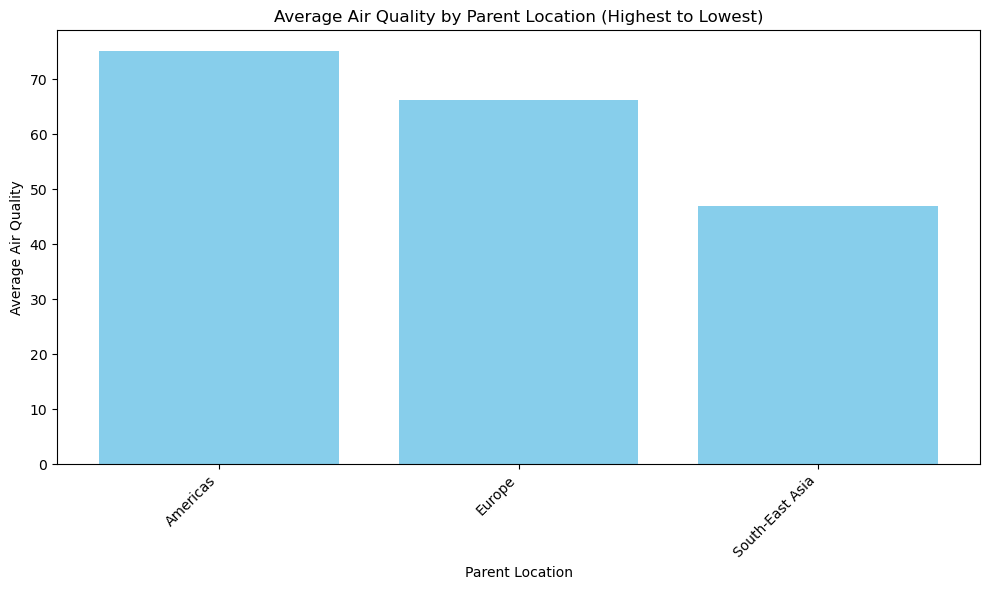

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
users_df = users_df[['ParentLocation', 'AirQuality']]
avg_air_quality = users_df.groupby('ParentLocation', as_index=False)['AirQuality'].mean()
avg_air_quality = avg_air_quality.sort_values(by='AirQuality', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(avg_air_quality['ParentLocation'], avg_air_quality['AirQuality'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Air Quality by Parent Location (Highest to Lowest)')
plt.xlabel('Parent Location')
plt.ylabel('Average Air Quality')
plt.tight_layout()
plt.show()


In [ ]:
Water pollution

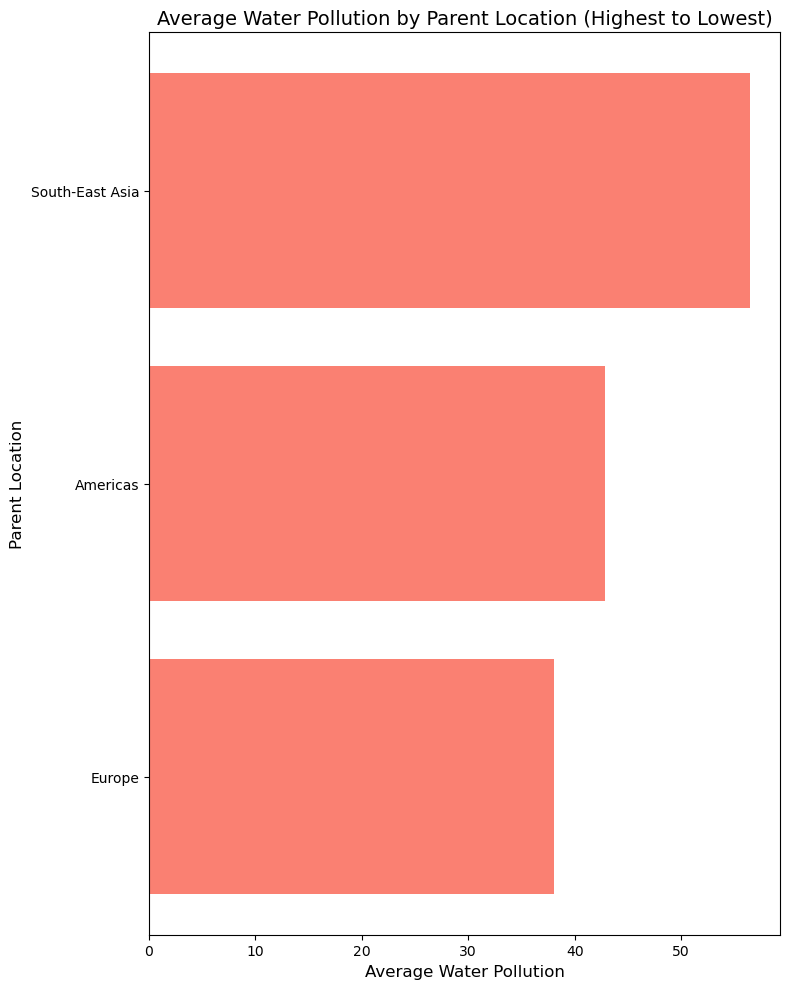

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
users_df = users_df[['ParentLocation', 'WaterPollution']]
avg_water_pollution = users_df.groupby('ParentLocation', as_index=False)['WaterPollution'].mean()
avg_water_pollution = avg_water_pollution.sort_values(by='WaterPollution', ascending=False)
plt.figure(figsize=(8, 10))
plt.barh(avg_water_pollution['ParentLocation'], avg_water_pollution['WaterPollution'], color='salmon')
plt.title('Average Water Pollution by Parent Location (Highest to Lowest)', fontsize=14)
plt.xlabel('Average Water Pollution', fontsize=12)
plt.ylabel('Parent Location', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


In [ ]:
Top 5 countries of most water pollution continent wise

C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\1202523147.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_countries_by_location = grouped_data.groupby('ParentLocation').apply(


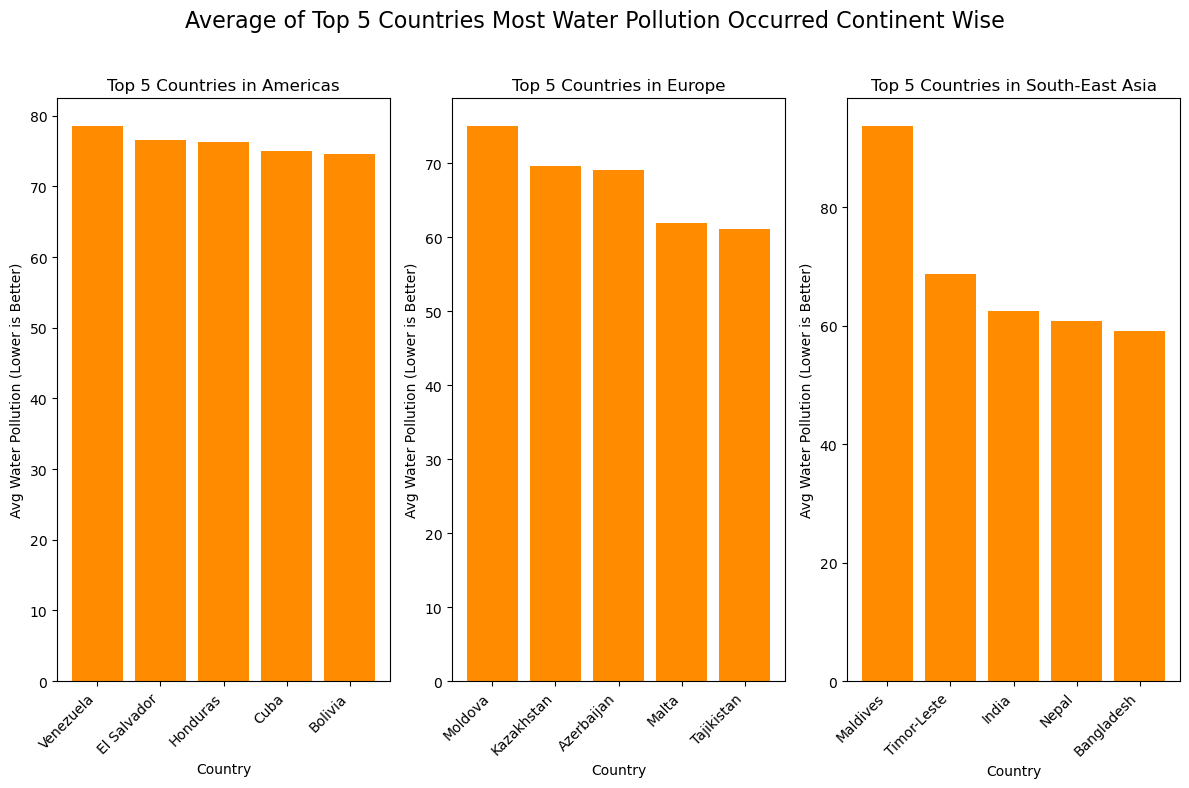

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
grouped_data = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['WaterPollution'].mean()
top_5_countries_by_location = grouped_data.groupby('ParentLocation').apply(
    lambda x: x.nlargest(5, 'WaterPollution')
).reset_index(drop=True)
parent_locations = top_5_countries_by_location['ParentLocation'].unique()

plt.figure(figsize=(12, 8))
for i, location in enumerate(parent_locations):
    plt.subplot(1, len(parent_locations), i + 1)
    location_data = top_5_countries_by_location[top_5_countries_by_location['ParentLocation'] == location]
    plt.bar(location_data['Country'], location_data['WaterPollution'], color='darkorange')
    plt.title(f'Top 5 Countries in {location}')
    plt.xlabel('Country')
    plt.ylabel('Avg Water Pollution (Lower is Better)')
    plt.xticks(rotation=45, ha='right')
plt.suptitle("Average of Top 5 Countries Most Water Pollution Occurred Continent Wise", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
Top 5 Lowest Water Polluted Countries in Europe

C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\3293521140.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_lowest_polluted_countries = grouped_data.groupby('ParentLocation').apply(


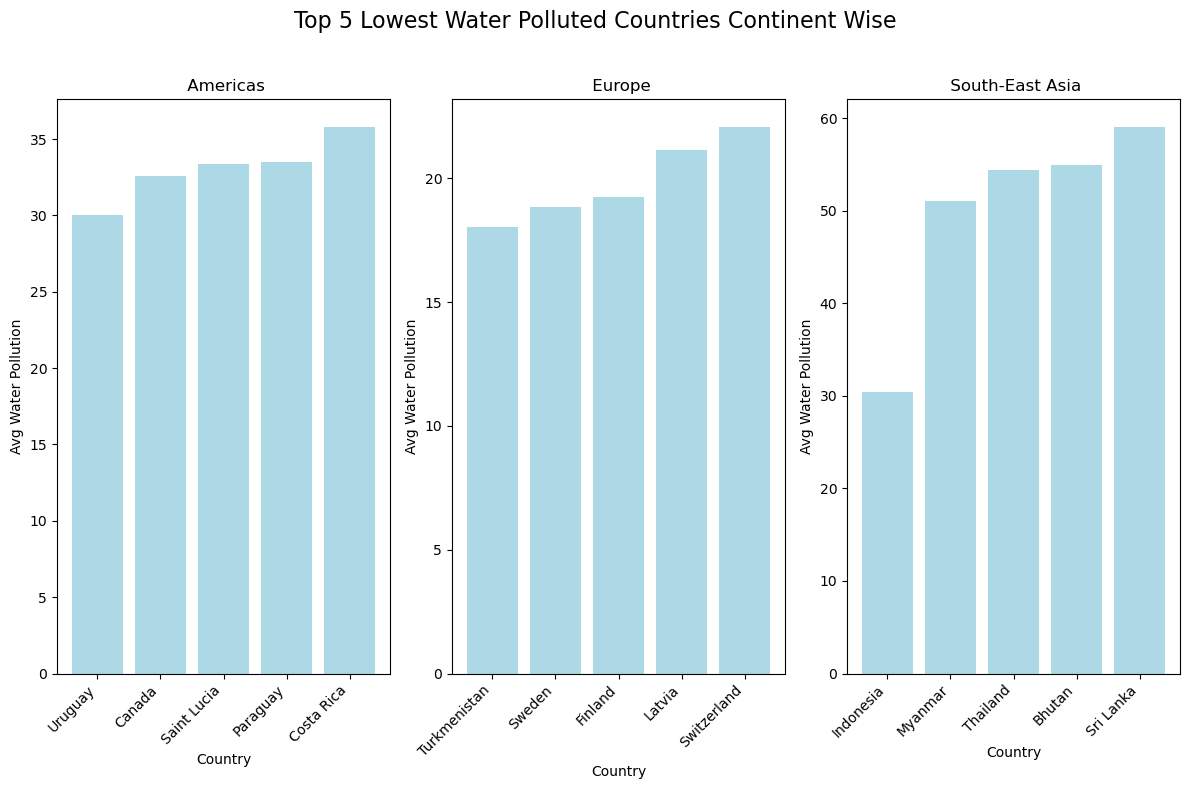

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
grouped_data = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['WaterPollution'].mean()
top_5_lowest_polluted_countries = grouped_data.groupby('ParentLocation').apply(
    lambda x: x.nsmallest(5, 'WaterPollution')
).reset_index(drop=True)
parent_locations = top_5_lowest_polluted_countries['ParentLocation'].unique()

plt.figure(figsize=(12, 8))
for i, location in enumerate(parent_locations):
    plt.subplot(1, len(parent_locations), i + 1)
    location_data = top_5_lowest_polluted_countries[top_5_lowest_polluted_countries['ParentLocation'] == location]
    plt.bar(location_data['Country'], location_data['WaterPollution'], color='lightblue')
    plt.title(f' {location}')
    plt.xlabel('Country')
    plt.ylabel('Avg Water Pollution')
    plt.xticks(rotation=45, ha='right')
plt.suptitle("Top 5 Lowest Water Polluted Countries Continent Wise", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [92]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme, element_text
import matplotlib.pyplot as plt
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
grouped_data = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['WaterPollution'].mean()
top_5_lowest_polluted_countries = grouped_data.groupby('ParentLocation').apply(
    lambda x: x.nsmallest(5, 'WaterPollution')
).reset_index(drop=True)
plot = (ggplot(top_5_lowest_polluted_countries, aes(x='Country', y='WaterPollution', fill='ParentLocation')) +
        geom_bar(stat='identity', position='dodge') +
        facet_wrap('~ParentLocation') + 
        labs(title='Top 5 Lowest Water Polluted Countries Continent Wise',
             x='Country',
             y='Average Water Pollution') +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              figure_size=(14, 8)))
print(plot)
plt.show()


<ggplot: (1400 x 800)>


C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\1899266560.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [ ]:
Top 5 countries of most healthy airquality continent wise

C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\650378492.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


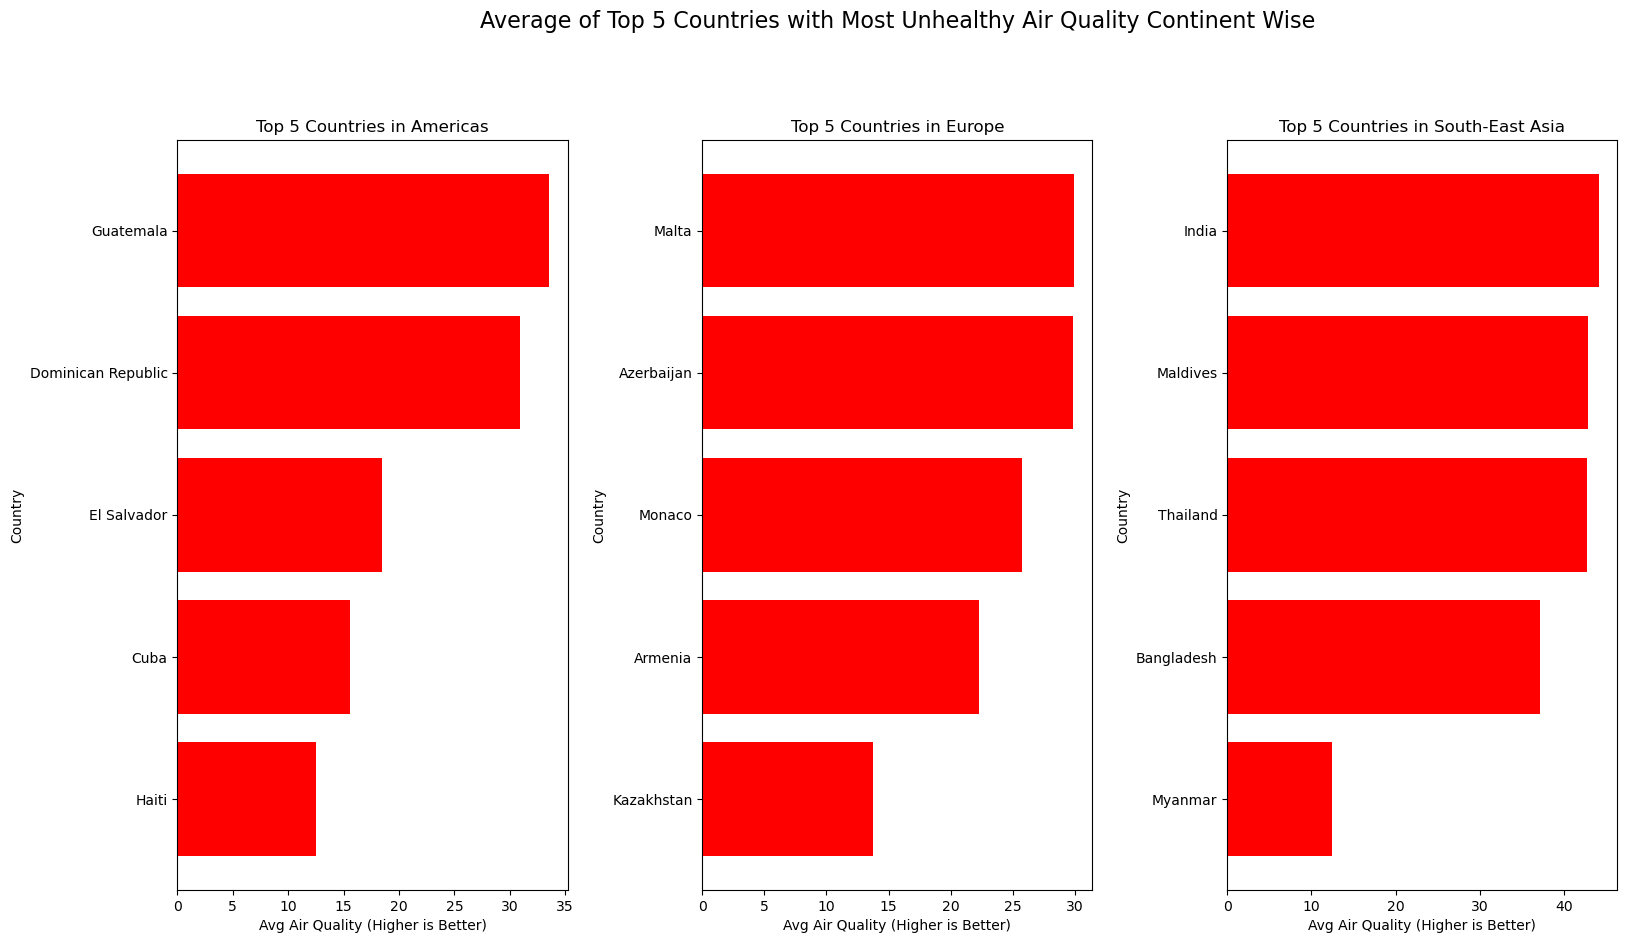

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\Cities1.csv")
grouped_data_airquality = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['AirQuality'].mean()
top_5_countries_by_airquality = grouped_data_airquality.groupby('ParentLocation').apply(
    lambda x: x.nsmallest(5, 'AirQuality')
).reset_index(drop=True)
parent_locations = top_5_countries_by_airquality['ParentLocation'].unique()
plt.figure(figsize=(16, 10))
for i, location in enumerate(parent_locations):
    plt.subplot(1, len(parent_locations), i + 1)
    location_data = top_5_countries_by_airquality[top_5_countries_by_airquality['ParentLocation'] == location]
    plt.barh(location_data['Country'], location_data['AirQuality'], color='red')
    plt.title(f'Top 5 Countries in {location}')
    plt.xlabel('Avg Air Quality (Higher is Better)')
    plt.ylabel('Country')
    plt.tight_layout()
plt.suptitle("Average of Top 5 Countries with Most Unhealthy Air Quality Continent Wise", fontsize=16)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.1)
plt.show()


C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\3356742019.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


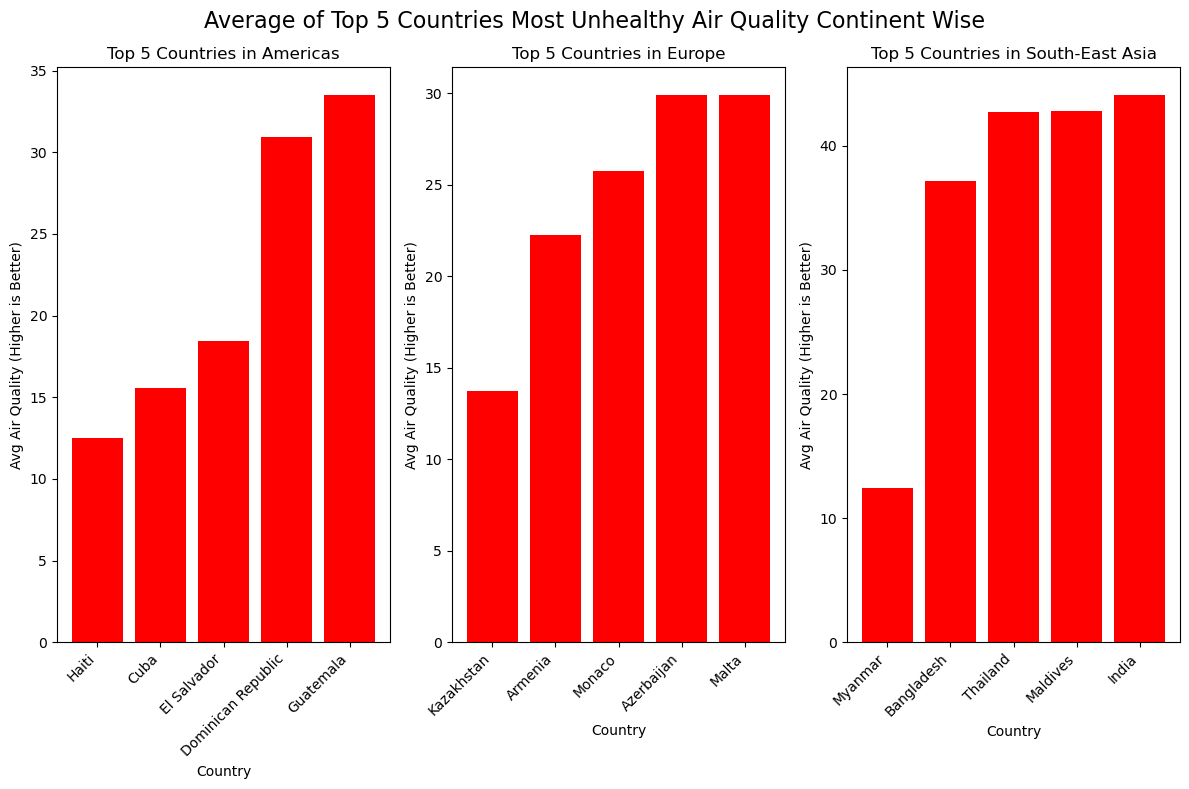

In [112]:

grouped_data_airquality = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['AirQuality'].mean()
top_5_countries_by_airquality = grouped_data_airquality.groupby('ParentLocation').apply(
    lambda x: x.nsmallest(5, 'AirQuality')
).reset_index(drop=True)
parent_locations = top_5_countries_by_airquality['ParentLocation'].unique()

plt.figure(figsize=(12, 8))
for i, location in enumerate(parent_locations):
    plt.subplot(1, len(parent_locations), i + 1)
    location_data = top_5_countries_by_airquality[top_5_countries_by_airquality['ParentLocation'] == location]
    plt.bar(location_data['Country'], location_data['AirQuality'], color='red')
    plt.title(f'Top 5 Countries in {location}')
    plt.xlabel('Country')
    plt.ylabel('Avg Air Quality (Higher is Better)')
    plt.xticks(rotation=45, ha='right')
plt.suptitle("Average of Top 5 Countries Most Unhealthy Air Quality Continent Wise", fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
Average of Top 5 Countries with Most Healthy Air Quality Continent Wise

C:\Users\G A  COMPUTERS\AppData\Local\Temp\ipykernel_16596\3390998174.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


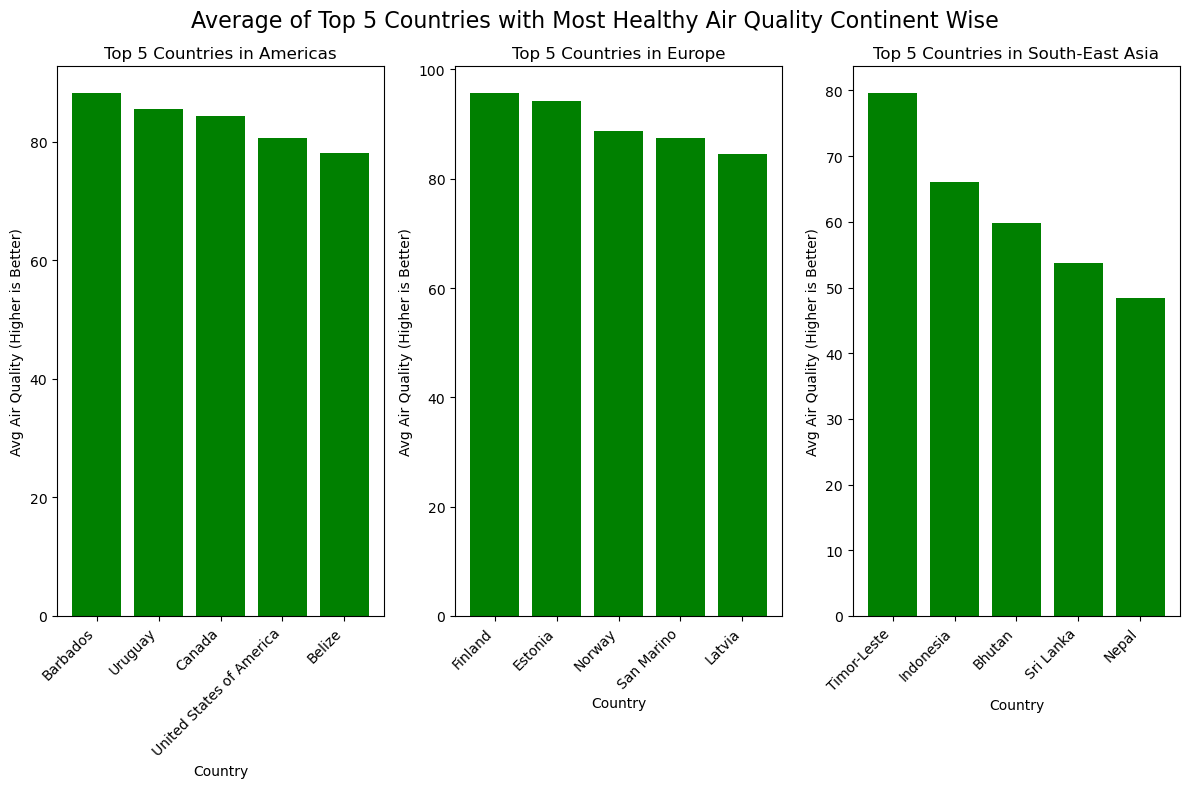

In [116]:

grouped_data_airquality = users_df.groupby(['ParentLocation', 'Country'], as_index=False)['AirQuality'].mean()
top_5_countries_by_airquality = grouped_data_airquality.groupby('ParentLocation').apply(
    lambda x: x.nlargest(5, 'AirQuality')
).reset_index(drop=True)
parent_locations = top_5_countries_by_airquality['ParentLocation'].unique()

plt.figure(figsize=(12, 8))
for i, location in enumerate(parent_locations):
    plt.subplot(1, len(parent_locations), i + 1)
    location_data = top_5_countries_by_airquality[top_5_countries_by_airquality['ParentLocation'] == location]
    plt.bar(location_data['Country'], location_data['AirQuality'], color='green')
    plt.title(f'Top 5 Countries in {location}')
    plt.xlabel('Country')
    plt.ylabel('Avg Air Quality (Higher is Better)')
    plt.xticks(rotation=45, ha='right')
plt.suptitle("Average of Top 5 Countries with Most Healthy Air Quality Continent Wise", fontsize=16)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

users_df = pd.read_csv(r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\WHO_PM_Filtered.csv")
print("Dataset Preview:")
display(users_df.head())

print("\nDataset Information:")
users_df.info()

print("\nSummary Statistics:")
display(users_df.describe())

Dataset Preview:


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-11T23:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-11T23:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-11T23:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,RUS,Russian Federation,Year,2019,...,NaN,NaN,8.58,NaN,12.57,10.19 [8.58-12.57],NaN,NaN,EN,2022-08-11T23:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,ESP,Spain,Year,2019,...,NaN,NaN,9.94,NaN,10.38,10.19 [9.94-10.38],NaN,NaN,EN,2022-08-11T23:00:00.000Z



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               2850 non-null   object 
 1   Indicator                   2850 non-null   object 
 2   ValueType                   2850 non-null   object 
 3   ParentLocationCode          2850 non-null   object 
 4   ParentLocation              2850 non-null   object 
 5   Location type               2850 non-null   object 
 6   SpatialDimValueCode         2850 non-null   object 
 7   Location                    2850 non-null   object 
 8   Period type                 2850 non-null   object 
 9   Period                      2850 non-null   int64  
 10  IsLatestYear                2850 non-null   bool   
 11  Dim1 type                   2850 non-null   object 
 12  Dim1                        2850 non-null   object 
 13  Dim1ValueCo

,Period,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,FactValueTranslationID,FactComments
count,2850.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2850.000000,0.0,0.0,2850.000000,0.0,2850.000000,0.0,0.0
mean,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.076944,NaN,NaN,15.452467,NaN,23.851361,NaN,NaN
std,2.872785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.116808,NaN,NaN,9.603646,NaN,16.574223,NaN,NaN
min,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.590000,NaN,NaN,2.950000,NaN,5.260000,NaN,NaN
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.530000,NaN,NaN,8.490000,NaN,12.855000,NaN,NaN
50%,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.970000,NaN,NaN,13.540000,NaN,19.260000,NaN,NaN
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.150000,NaN,NaN,19.017500,NaN,28.115000,NaN,NaN
max,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.680000,NaN,NaN,61.830000,NaN,114.700000,NaN,NaN


In [ ]:
Compare PM2.5 Concentrations Across Regions (Analysis: Group data by ParentLocation (e.g., Africa, Americas, Europe) and calculate the average, minimum, and maximum PM2.5 concentrations (FactValueNumeric) for each region.)

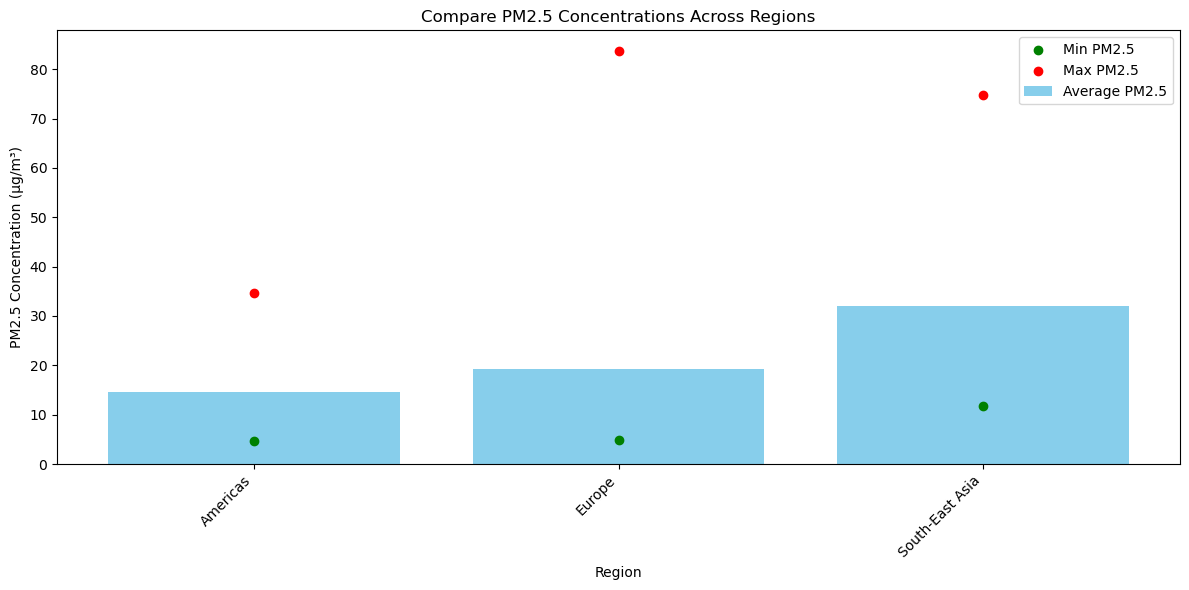

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
file_path = r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\WHO_PM_Filtered.csv"
users_df = pd.read_csv(file_path)
regional_stats = users_df.groupby('ParentLocation')['FactValueNumeric'].agg(['mean', 'min', 'max']).reset_index()
regional_stats.columns = ['Region', 'Average_PM2.5', 'Min_PM2.5', 'Max_PM2.5']
plt.figure(figsize=(12, 6))
x = range(len(regional_stats))

plt.bar(x, regional_stats['Average_PM2.5'], color='skyblue', label='Average PM2.5')
plt.scatter(x, regional_stats['Min_PM2.5'], color='green', label='Min PM2.5')
plt.scatter(x, regional_stats['Max_PM2.5'], color='red', label='Max PM2.5')
plt.xticks(x, regional_stats['Region'], rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('Compare PM2.5 Concentrations Across Regions')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
Explore Trends Over Time (Analysis: If the dataset contains multiple years (Period column), analyze how PM2.5 concentrations have changed over time for a specific region or globally)

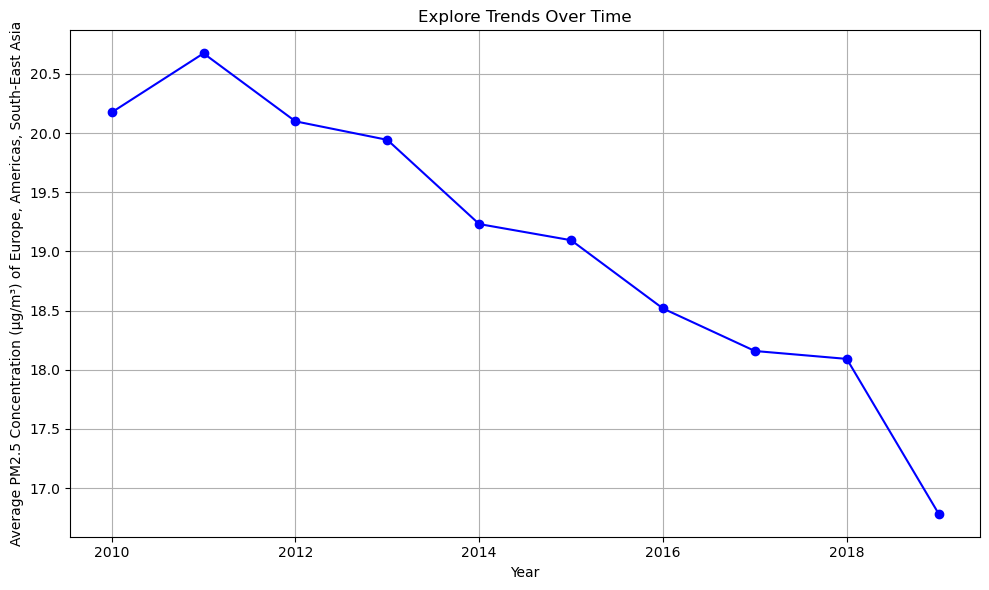

In [67]:

file_path = r"D:\Uni Graz Assignments\FCSS\Final Assignment\Water Quality - Every Drop Matters\WHO_PM_Filtered.csv"
users_df = pd.read_csv(file_path)
users_df['Period'] = pd.to_numeric(users_df['Period'], errors='coerce')
time_trends = users_df.groupby('Period')['FactValueNumeric'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(time_trends['Period'], time_trends['FactValueNumeric'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration (µg/m³) of Europe, Americas, South-East Asia')
plt.title('Explore Trends Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Compare Countries Within a Region (Analysis: Select a specific region (e.g., Africa) and compare PM2.5 levels among countries in that region using FactValueNumeric.)

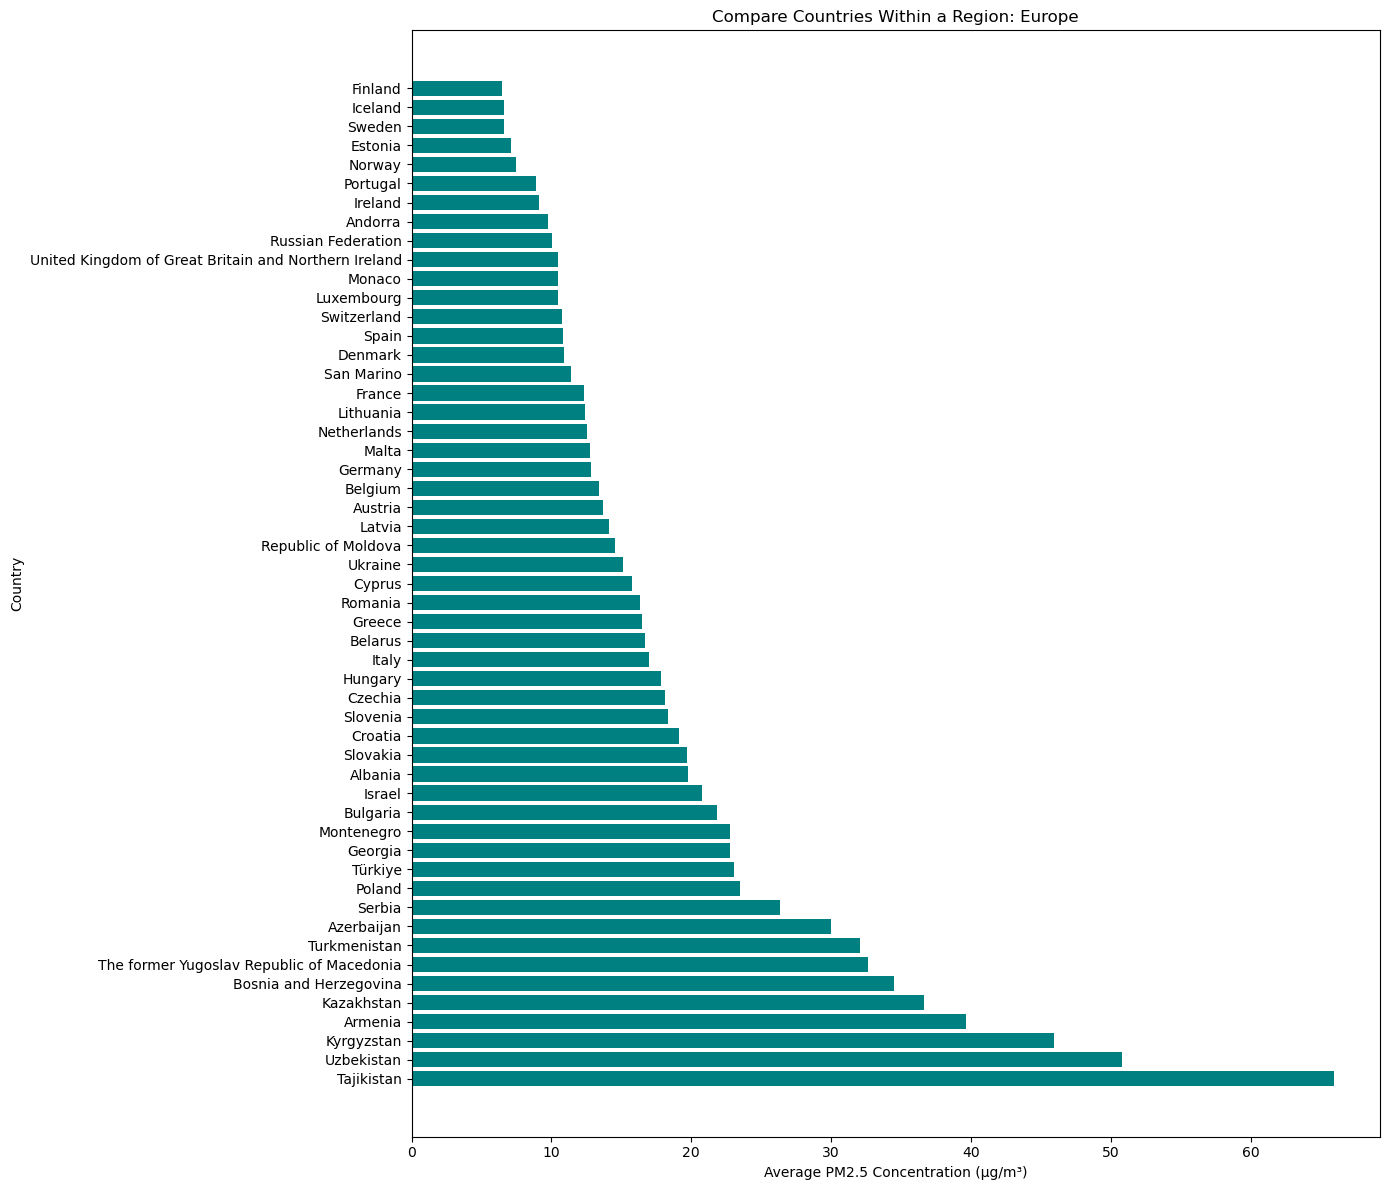

In [35]:

region_of_interest = 'Europe'
region_data = users_df[users_df['ParentLocation'] == region_of_interest]
country_comparison = region_data.groupby('Location')['FactValueNumeric'].mean().reset_index()
country_comparison = country_comparison.sort_values(by='FactValueNumeric', ascending=False)
plt.figure(figsize=(14, 12))
plt.barh(country_comparison['Location'], country_comparison['FactValueNumeric'], color='teal')
plt.xlabel('Average PM2.5 Concentration (µg/m³)')
plt.ylabel('Country')
plt.title('Compare Countries Within a Region: Europe')
plt.tight_layout()
plt.show()


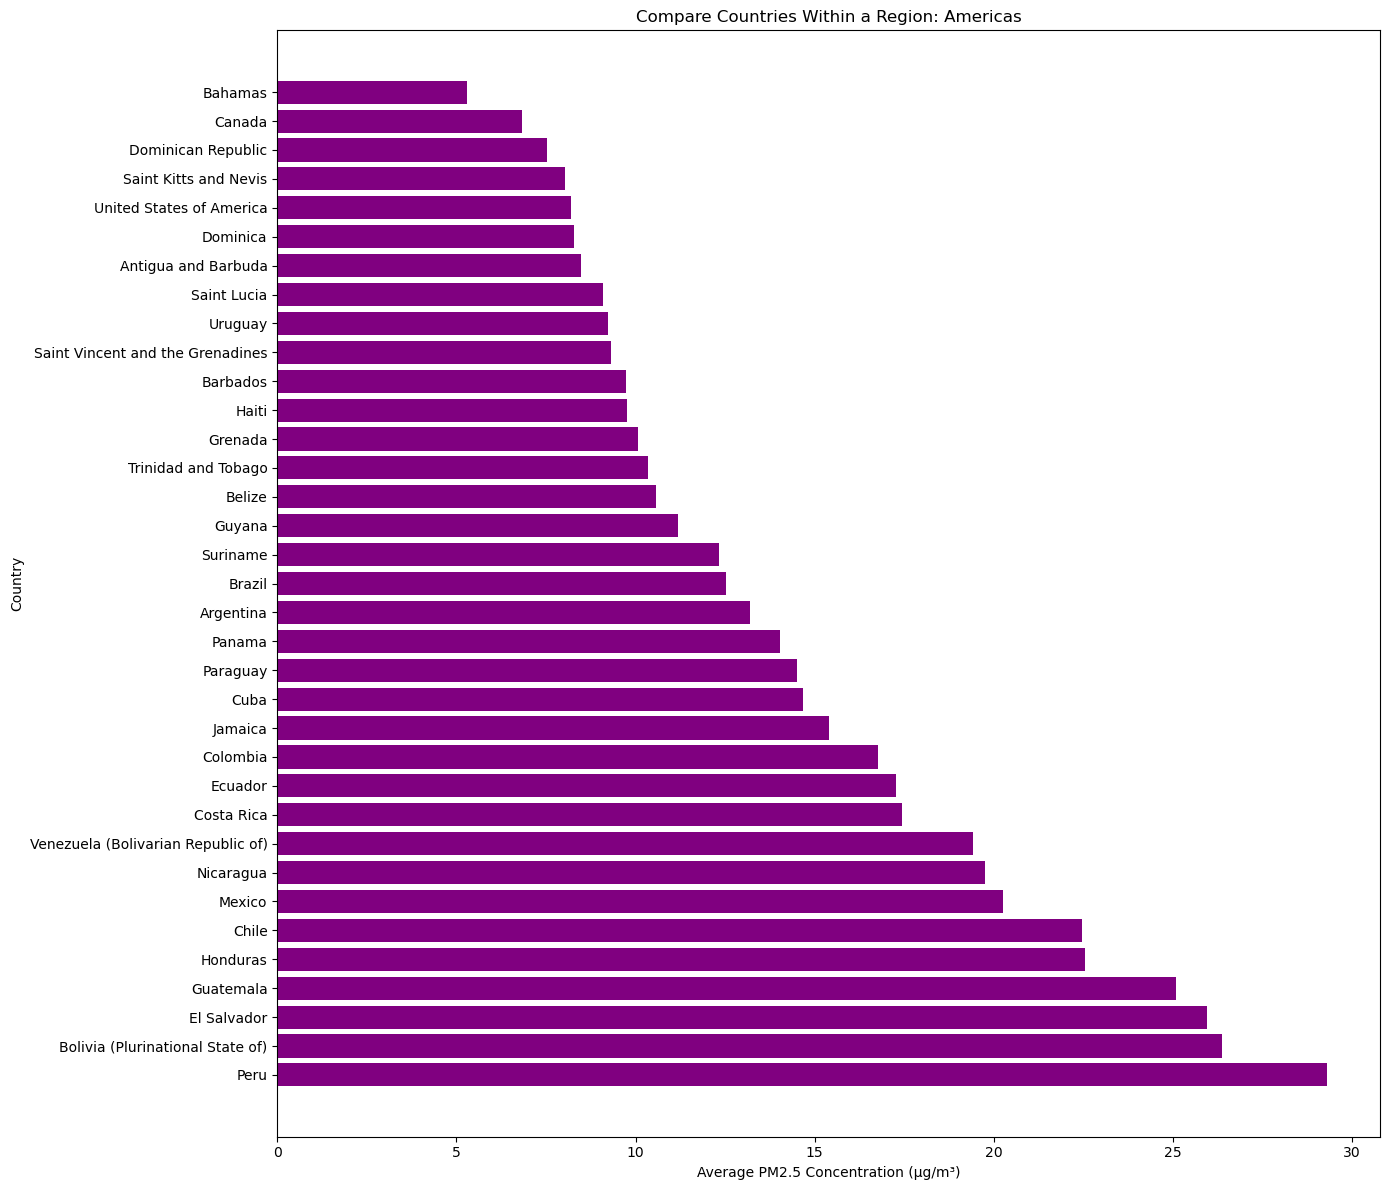

In [37]:

region_of_interest = 'Americas'
region_data = users_df[users_df['ParentLocation'] == region_of_interest]
country_comparison = region_data.groupby('Location')['FactValueNumeric'].mean().reset_index()
country_comparison = country_comparison.sort_values(by='FactValueNumeric', ascending=False)
plt.figure(figsize=(14, 12))
plt.barh(country_comparison['Location'], country_comparison['FactValueNumeric'], color='purple')
plt.xlabel('Average PM2.5 Concentration (µg/m³)')
plt.ylabel('Country')
plt.title('Compare Countries Within a Region: Americas')
plt.tight_layout()
plt.show()


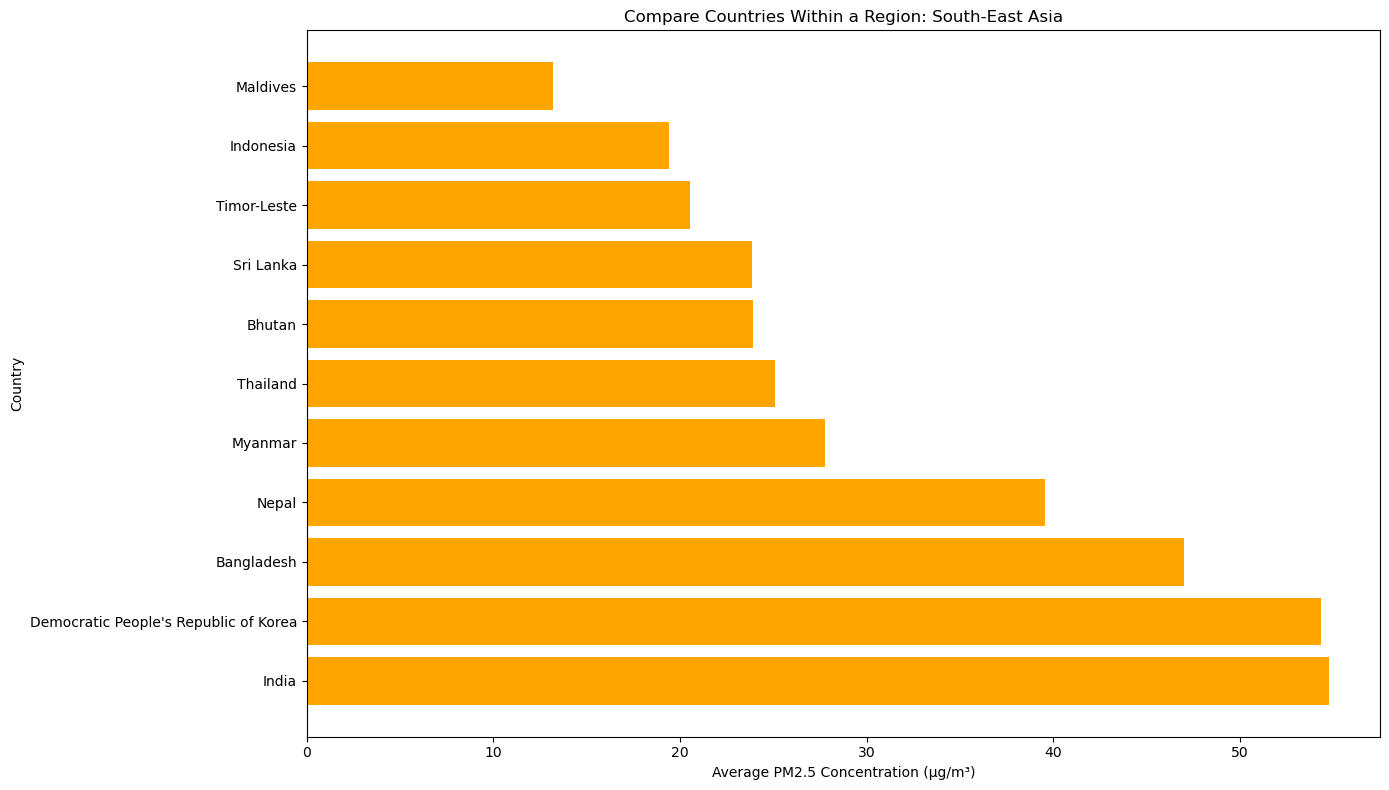

In [39]:

region_of_interest = 'South-East Asia'
region_data = users_df[users_df['ParentLocation'] == region_of_interest]
country_comparison = region_data.groupby('Location')['FactValueNumeric'].mean().reset_index()
country_comparison = country_comparison.sort_values(by='FactValueNumeric', ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(country_comparison['Location'], country_comparison['FactValueNumeric'], color='orange')

plt.xlabel('Average PM2.5 Concentration (µg/m³)')
plt.ylabel('Country')
plt.title('Compare Countries Within a Region: South-East Asia')

plt.tight_layout()
plt.show()


In [ ]:
Compare Ranges of PM2.5 Concentrations (Analysis: Use FactValueNumericLow and FactValueNumericHigh to show variability in PM2.5 measurements across countries or regions.)

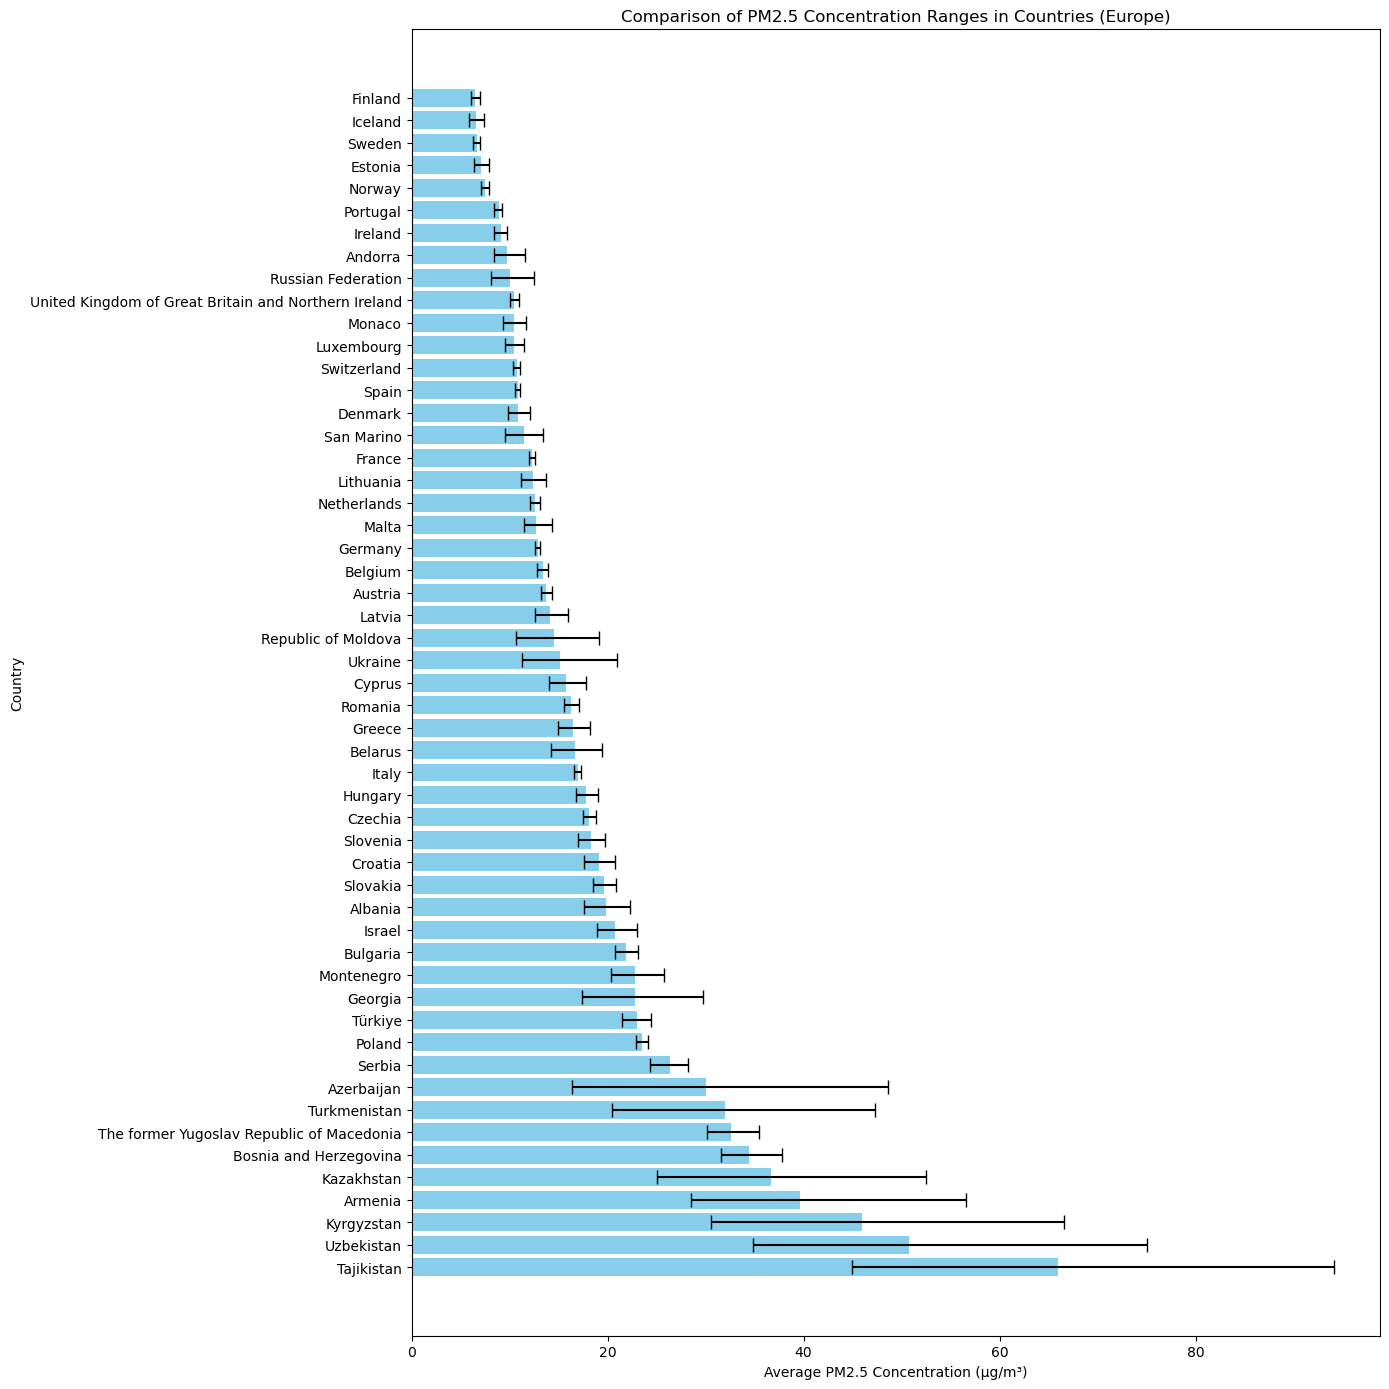

In [31]:

region_of_interest = 'Europe'
region_data = users_df[users_df['ParentLocation'] == region_of_interest]
country_comparison = region_data.groupby('Location').agg(
    mean_pm25=('FactValueNumeric', 'mean'),
    low_pm25=('FactValueNumericLow', 'mean'),
    high_pm25=('FactValueNumericHigh', 'mean')
).reset_index()
country_comparison = country_comparison.sort_values(by='mean_pm25', ascending=False)
plt.figure(figsize=(14, 14))
plt.barh(country_comparison['Location'], country_comparison['mean_pm25'], color='skyblue', xerr=[country_comparison['mean_pm25'] - country_comparison['low_pm25'], country_comparison['high_pm25'] - country_comparison['mean_pm25']], capsize=5)

plt.xlabel('Average PM2.5 Concentration (µg/m³)')
plt.ylabel('Country')
plt.title('Comparison of PM2.5 Concentration Ranges in Countries (Europe)')
plt.tight_layout()
plt.show()


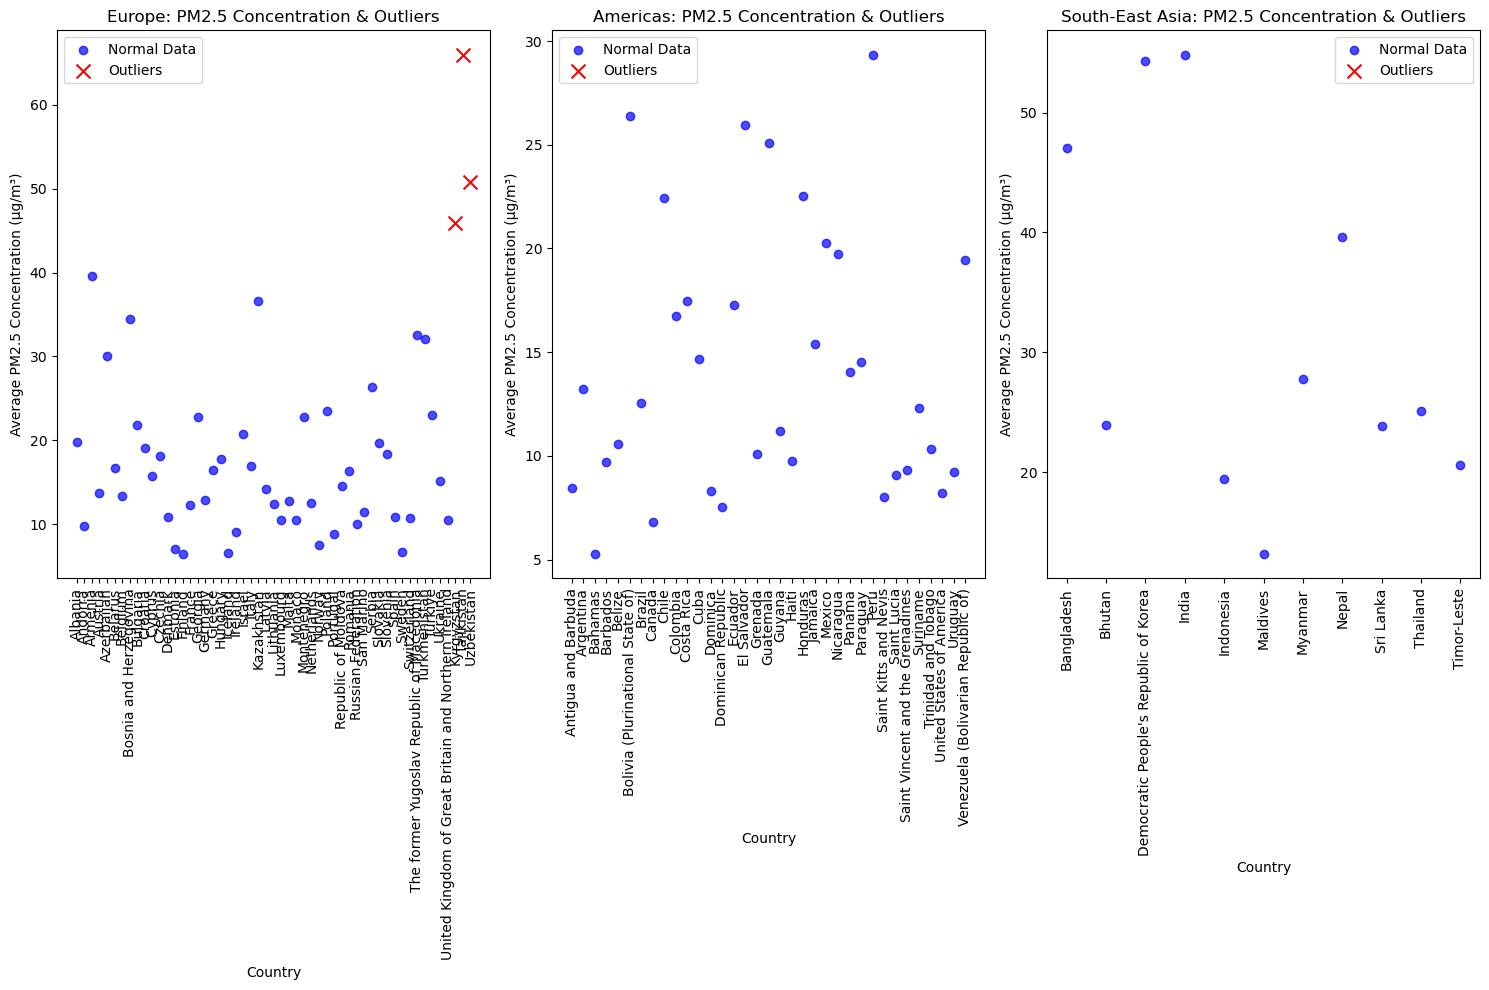

In [5]:

continents_of_interest = ['Europe', 'Americas', 'South-East Asia']
plt.figure(figsize=(15, 10))
for i, continent in enumerate(continents_of_interest):
    continent_data = users_df[users_df['ParentLocation'] == continent]
    country_comparison = continent_data.groupby('Location')['FactValueNumeric'].mean().reset_index()
    Q1 = country_comparison['FactValueNumeric'].quantile(0.25)
    Q3 = country_comparison['FactValueNumeric'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = country_comparison[(country_comparison['FactValueNumeric'] < lower_bound) | 
                                  (country_comparison['FactValueNumeric'] > upper_bound)]

    non_outliers = country_comparison[(country_comparison['FactValueNumeric'] >= lower_bound) & 
                                      (country_comparison['FactValueNumeric'] <= upper_bound)]

    plt.subplot(1, 3, i + 1)
    plt.scatter(non_outliers['Location'], non_outliers['FactValueNumeric'], label='Normal Data', color='blue', alpha=0.7)
    plt.scatter(outliers['Location'], outliers['FactValueNumeric'], label='Outliers', color='red', marker='x', s=100)
    plt.xlabel('Country')
    plt.ylabel('Average PM2.5 Concentration (µg/m³)')
    plt.title(f'{continent}: PM2.5 Concentration & Outliers')
    plt.xticks(rotation=90)
    plt.legend()
plt.tight_layout()
plt.show()


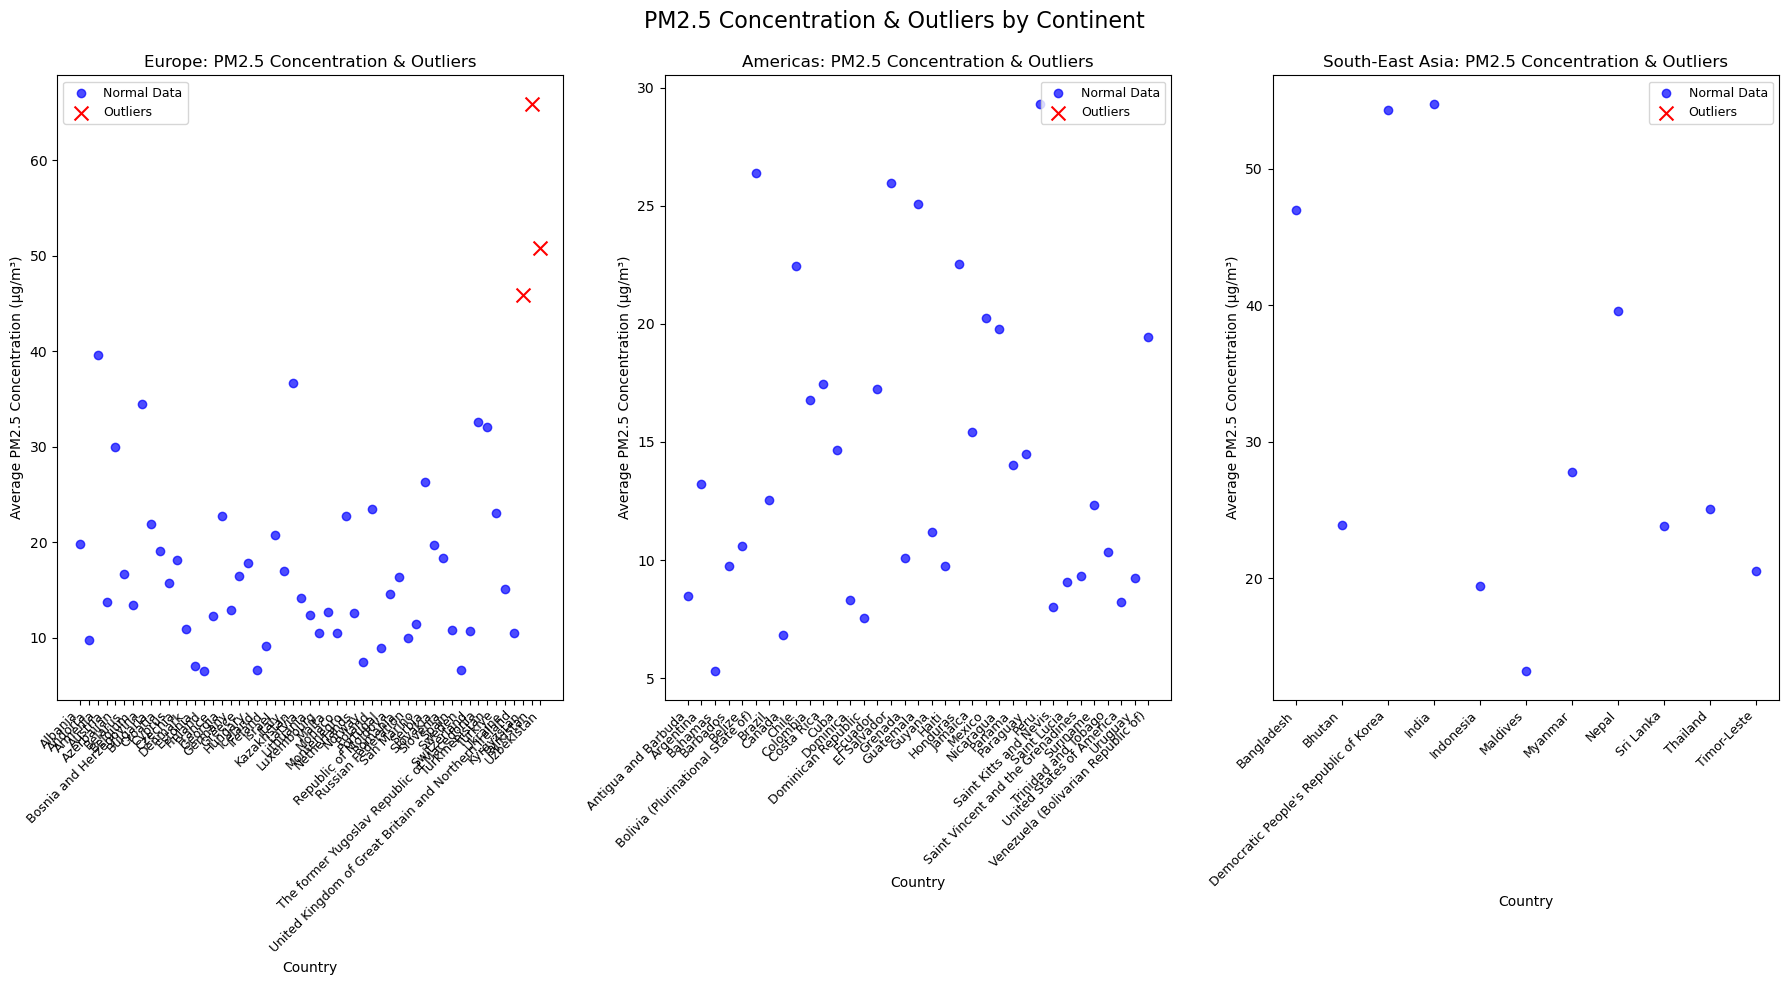

In [7]:

continents_of_interest = ['Europe', 'Americas', 'South-East Asia']
plt.figure(figsize=(18, 10))
for i, continent in enumerate(continents_of_interest):
    continent_data = users_df[users_df['ParentLocation'] == continent]
    country_comparison = continent_data.groupby('Location')['FactValueNumeric'].mean().reset_index()
    Q1 = country_comparison['FactValueNumeric'].quantile(0.25)
    Q3 = country_comparison['FactValueNumeric'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = country_comparison[(country_comparison['FactValueNumeric'] < lower_bound) | 
                                  (country_comparison['FactValueNumeric'] > upper_bound)]
    non_outliers = country_comparison[(country_comparison['FactValueNumeric'] >= lower_bound) & 
                                      (country_comparison['FactValueNumeric'] <= upper_bound)]
    plt.subplot(1, 3, i + 1)
    plt.scatter(non_outliers['Location'], non_outliers['FactValueNumeric'], label='Normal Data', color='blue', alpha=0.7)
    plt.scatter(outliers['Location'], outliers['FactValueNumeric'], label='Outliers', color='red', marker='x', s=100)
    plt.xlabel('Country', fontsize=10)
    plt.ylabel('Average PM2.5 Concentration (µg/m³)', fontsize=10)
    plt.title(f'{continent}: PM2.5 Concentration & Outliers', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.legend(fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("PM2.5 Concentration & Outliers by Continent", fontsize=16)
plt.show()


Processing Europe...
Processing Americas...
Processing South-East Asia...


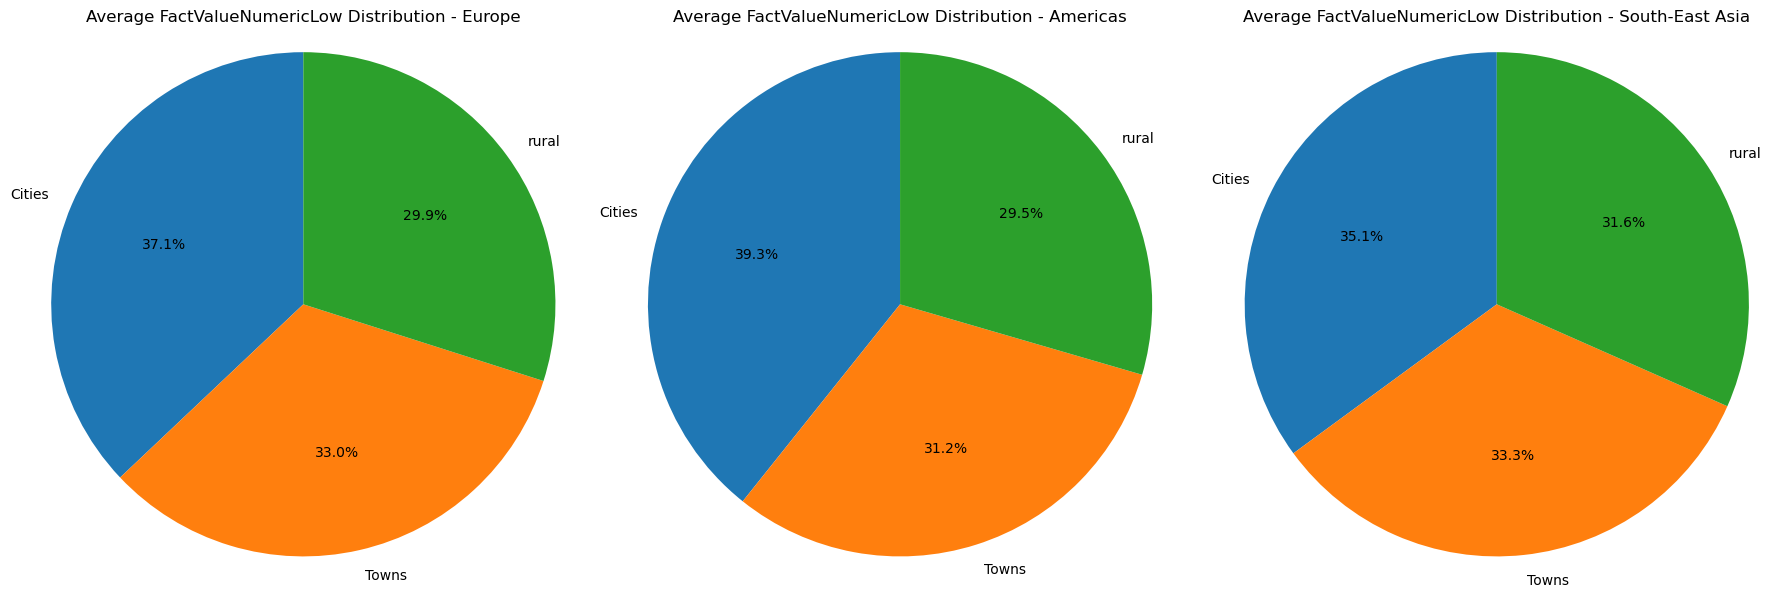

In [51]:

filtered_data = data[['ParentLocation', 'Dim1', 'FactValueNumericLow']]
continents = ['Europe', 'Americas', 'South-East Asia']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, continent in enumerate(continents):
    print(f"Processing {continent}...")
    continent_data = filtered_data[filtered_data['ParentLocation'] == continent]
    avg_fact_value_low = continent_data.groupby('Dim1')['FactValueNumericLow'].mean()
    axes[i].pie(avg_fact_value_low, labels=avg_fact_value_low.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Average FactValueNumericLow Distribution - {continent}")
    axes[i].axis('equal')
plt.show()
